<a href="https://colab.research.google.com/github/ou12ma/mvc/blob/main/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMAP

## imports

In [ ]:
!pip install umap-learn
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.3 MB/s eta 0:00:00


## UMAP for Ellipsoide

### Prepare data

In [ ]:
import scipy.io
import numpy as np

# Load the Ellipsoid Data
mat_ellips = scipy.io.loadmat('datasets/datasets/ellipsoide_standardpca.mat')
X_ellips = mat_ellips['X']  # Assuming 'X' is the key for the data

# Print shape of the data
n, d = X_ellips.shape
print('n,d:', n, d)  # n: number of samples, d: number of dimensions


n,d: 1000 100


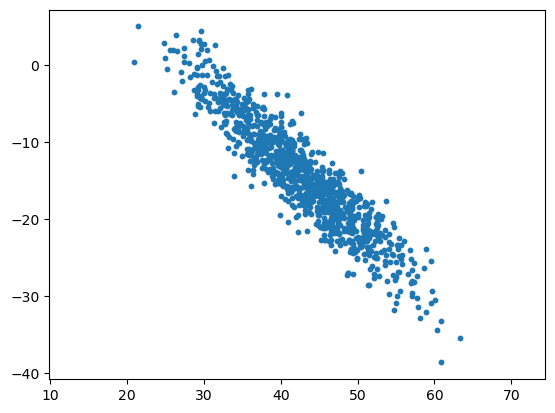

In [ ]:
# Plot the data
plt.scatter(X_ellips[:,0], X_ellips[:,1], s=10)
plt.axis('equal')
plt.show()

### Reproject dataset

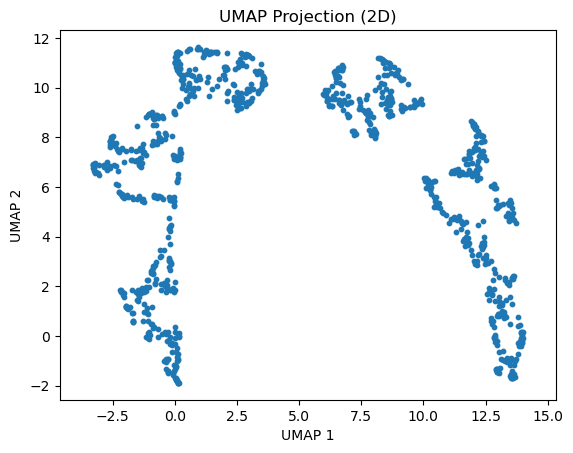

In [ ]:
# Run UMAP to project the data into 2D
reducer = umap.UMAP(n_components=2)
embedding_ellips = reducer.fit_transform(X_ellips)

# Plot the UMAP projection
plt.scatter(embedding_ellips[:, 0], embedding_ellips[:, 1], s=10)
plt.title('UMAP Projection (2D)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.axis('equal')
plt.show()

## UMAP for Swiss roll

### Prepare data

In [ ]:
# Swiss roll data
mat_roll = scipy.io.loadmat('datasets/datasets/swiss_roll.mat')
X_roll = mat_roll['X']
Xref_roll = X_roll
n = X_roll.shape[0]
d = X_roll.shape[1]

print('n,d:',n,d)

n,d: 2048 3


In [ ]:
Cgt_roll = mat_roll['Cgt'].squeeze()
Ccolor_roll = ['rgb('+str(c[0]*255)+', '+str(c[1]*255)+', '+str(c[2]*255)+')' for c in Cgt_roll]

### Run UMAP

- 2D projection

In [ ]:
# UMAP: 2D Projection
reducer_2d = umap.UMAP(n_components=2)
embedding_2d = reducer_2d.fit_transform(X_roll)


C:\Users\dell latitude 7400\AppData\Local\Temp\ipykernel_27468\2563846546.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=Cgt_roll, cmap='Spectral', s=10)


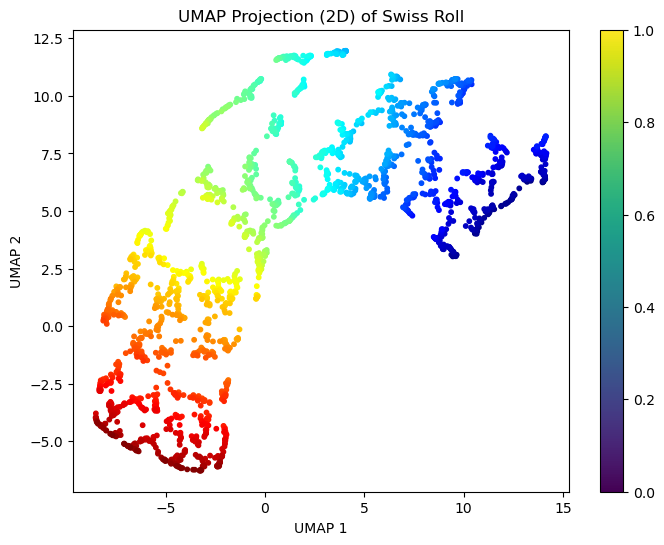

In [ ]:
# Plot UMAP 2D Projection
plt.figure(figsize=(8, 6))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=Cgt_roll, cmap='Spectral', s=10)
plt.title('UMAP Projection (2D) of Swiss Roll')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()

- 3D projection

In [ ]:
# UMAP: 3D Projection
reducer_3d = umap.UMAP(n_components=3)
embedding_3d = reducer_3d.fit_transform(X_roll)


C:\Users\dell latitude 7400\AppData\Local\Temp\ipykernel_27468\910591872.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=Cgt_roll, cmap='Spectral', s=10)


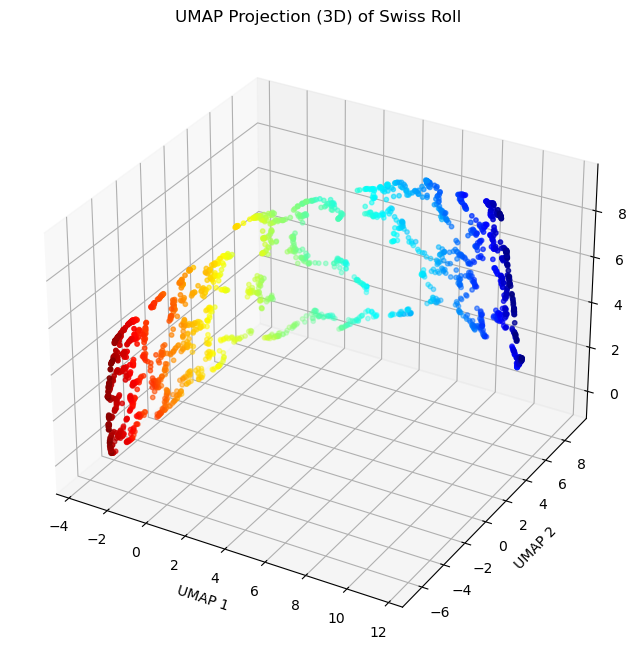

In [ ]:
# Plot UMAP 3D Projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=Cgt_roll, cmap='Spectral', s=10)
ax.set_title('UMAP Projection (3D) of Swiss Roll')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
plt.show()

## UMAP for MNIST

### Prepare data

In [ ]:
mat_mnist = scipy.io.loadmat('datasets/datasets/MNIST_data.mat')
X_mnist = Xref_minst = mat_mnist['X']
# get only the first samples
nb_samples = X_mnist.shape[0]
X_mnist = X_mnist[:nb_samples,:]
n = X_mnist.shape[0]
d = X_mnist.shape[1]
C_mnist = Cgt_mnist = mat_mnist['C'].squeeze()
Cgt_mnist = Cgt_mnist[:nb_samples]

### Run UMAP

- 2D projection

In [ ]:
### Run UMAP for 2D Projection
reducer_2d = umap.UMAP(n_components=2)
embedding_2d = reducer_2d.fit_transform(X_mnist)


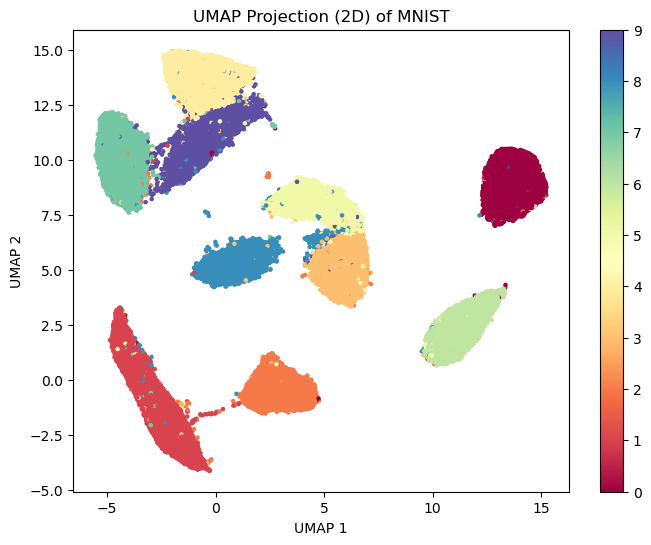

In [ ]:
# Plot UMAP 2D Projection
plt.figure(figsize=(8, 6))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=Cgt_mnist, cmap='Spectral', s=5)
plt.title('UMAP Projection (2D) of MNIST')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()

- 3D projection

In [ ]:
### Run UMAP for 3D Projection
reducer_3d = umap.UMAP(n_components=3)
embedding_3d = reducer_3d.fit_transform(X_mnist)


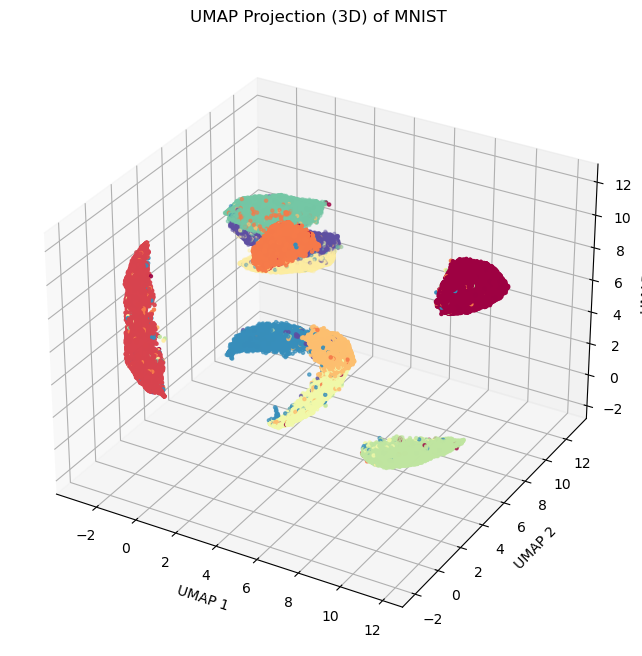

In [ ]:
# Plot UMAP 3D Projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=Cgt_mnist, cmap='Spectral', s=5)
ax.set_title('UMAP Projection (3D) of MNIST')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
plt.show()